In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load train Dataset

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualization

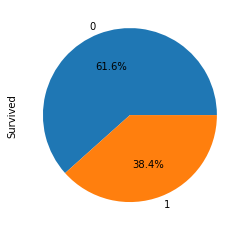

In [5]:
train_data.Survived.value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

In [6]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

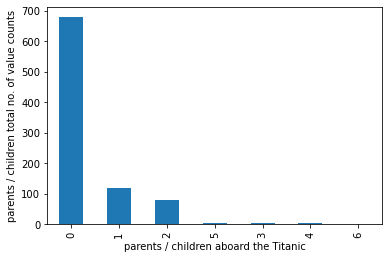

In [7]:
train_data.Parch.value_counts().plot.bar()
plt.xlabel('parents / children aboard the Titanic')
plt.ylabel('parents / children total no. of value counts')
plt.show()

In [8]:
train_data.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

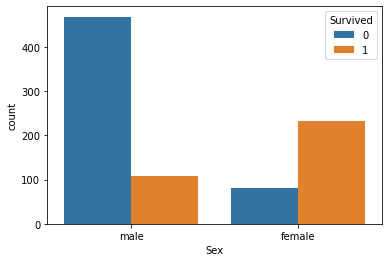

In [9]:
sns.countplot('Sex',data = train_data, hue='Survived')
plt.show()

In [10]:
pd.crosstab([train_data.Pclass,train_data.Sex], train_data.Survived)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

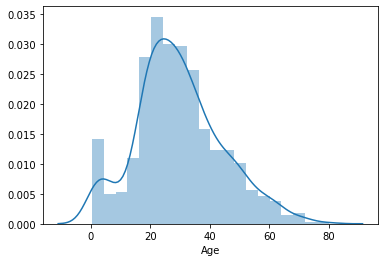

In [11]:
sns.distplot(train_data.Age)
plt.show()

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


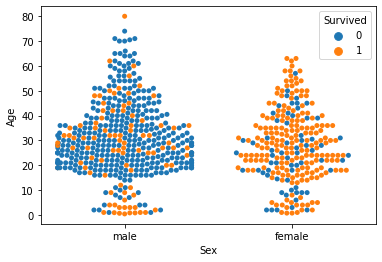

In [12]:
sns.swarmplot('Sex','Age',data=train_data, hue='Survived')
plt.show()

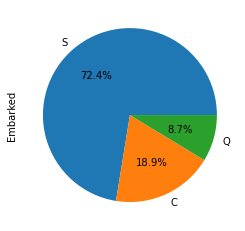

In [13]:
train_data.Embarked.value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

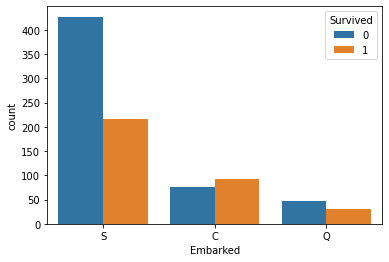

In [14]:
sns.countplot('Embarked',data = train_data, hue='Survived')
plt.show()

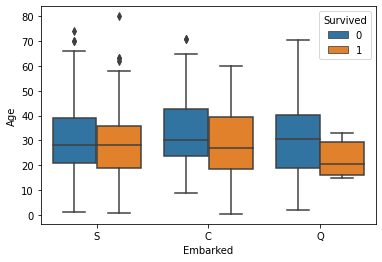

In [15]:
sns.boxplot('Embarked','Age',data = train_data, hue='Survived')
plt.show()

In [16]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
numeric_categorical_col = ['Pclass']

In [18]:
for col in numeric_categorical_col:
    train_data[col] = train_data[col].astype('category')

In [19]:
train_data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [20]:
# drop un necessary columns
train_data.drop(columns=['Name','Ticket','Cabin'], axis=1, inplace=True)

In [21]:
train_data.ffill(axis = 0,inplace=True)

In [22]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### creating dummies

In [24]:
new_train_data = pd.get_dummies(train_data)

In [25]:
new_train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [26]:
new_train_data.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.58156,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.189675,0.087542,0.722783
std,257.353842,0.486592,14.55459,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.392264,0.282787,0.447876
min,1.000000,0.000000,0.42000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.00000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.00000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,38.00000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.00000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
new_train_data.shape

(891, 14)

In [28]:
scale_col = ['Fare','Age','SibSp','Parch']

### Scale data

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
final_train_data = new_train_data.copy()
def make_min_max_scale(final_train_data,col):
    mms = MinMaxScaler()
    final_train_data[col] = mms.fit_transform(final_train_data[[col]])
    return final_train_data

In [31]:
for col in scale_col:
    final_train_data = make_min_max_scale(final_train_data,col)

In [32]:
final_train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0.271174,0.125,0.0,0.014151,0,0,1,0,1,0,0,1
1,2,1,0.472229,0.125,0.0,0.139136,1,0,0,1,0,1,0,0
2,3,1,0.321438,0.000,0.0,0.015469,0,0,1,1,0,0,0,1
3,4,1,0.434531,0.125,0.0,0.103644,1,0,0,1,0,0,0,1
4,5,0,0.434531,0.000,0.0,0.015713,0,0,1,0,1,0,0,1


In [33]:
x = final_train_data.drop(columns=['Survived','PassengerId'],axis=1)
y = final_train_data['Survived']

### split dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [36]:
x_train.shape, x_test.shape

((801, 12), (90, 12))

# 1. Logistic Regresion

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logit = LogisticRegression()

In [39]:
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = logit.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_test,y_pred)

0.8222222222222222

In [43]:
confusion_matrix(y_test,y_pred)

array([[44,  7],
       [ 9, 30]], dtype=int64)

## Test.csv data preprocessing

In [44]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
test_data.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [46]:
numeric_categorical_col = ['Pclass']
for col in numeric_categorical_col:
    test_data[col] = test_data[col].astype('category')


In [47]:
test_data.drop(columns=['Name','Ticket','Cabin'], axis=1, inplace=True)
test_data.ffill(axis = 0,inplace=True)
new_test_data = pd.get_dummies(test_data)

In [48]:
scale_col = ['Fare','Age','SibSp','Parch']

def make_min_max(new_test_data,col):
    mms = MinMaxScaler()
    new_test_data[col] = mms.fit_transform(new_test_data[[col]])
    return new_test_data

for col in scale_col:
    new_test_data = make_min_max(new_test_data,col)

In [49]:
new_test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0.452723,0.000,0.000000,0.015282,0,0,1,0,1,0,1,0
1,893,0.617566,0.125,0.000000,0.013663,0,0,1,1,0,0,0,1
2,894,0.815377,0.000,0.000000,0.018909,0,1,0,0,1,0,1,0
3,895,0.353818,0.000,0.000000,0.016908,0,0,1,0,1,0,0,1
4,896,0.287881,0.125,0.111111,0.023984,0,0,1,1,0,0,0,1


In [50]:
final_test = new_test_data.drop(columns=['PassengerId'],axis=1)

In [51]:
final_test.shape

(418, 12)

## prediction with final test.csv data

In [52]:
pred1 = logit.predict(final_test)

In [53]:
data = pd.read_csv('gender_submission.csv')
data.shape

(418, 2)

In [54]:
# file = {"PassengerId":data["PassengerId"],"Survived":pred1}
# file = pd.DataFrame(file)
# file.to_csv("PredByLogit.csv",index=False)

# 2. Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
pred2 = dt.predict(final_test)

In [59]:
# file = {"PassengerId":data["PassengerId"],"Survived":pred2}
# file = pd.DataFrame(file)
# file.to_csv("PredByDT.csv",index=False)

# 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=100)

In [62]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
pred3 = rfc.predict(final_test)

In [64]:
# file = {"PassengerId":data["PassengerId"],"Survived":pred3}
# file = pd.DataFrame(file)
# file.to_csv("PredByRandomForest.csv",index=False)

# 4. Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [67]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
pred4 = gbc.predict(final_test)

In [69]:
# file = {"PassengerId":data["PassengerId"],"Survived":pred4}
# file = pd.DataFrame(file)
# file.to_csv("PredByBoosting.csv",index=False)

# 5. By PCA

In [70]:
final_train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0.271174,0.125,0.0,0.014151,0,0,1,0,1,0,0,1
1,2,1,0.472229,0.125,0.0,0.139136,1,0,0,1,0,1,0,0
2,3,1,0.321438,0.000,0.0,0.015469,0,0,1,1,0,0,0,1
3,4,1,0.434531,0.125,0.0,0.103644,1,0,0,1,0,0,0,1
4,5,0,0.434531,0.000,0.0,0.015713,0,0,1,0,1,0,0,1


In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=4)

In [73]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
pca_data = pca.transform(x)

In [75]:
pca.explained_variance_ratio_.sum()

0.891560071013032

In [76]:
x_train, x_test, y_train, y_test = train_test_split(pca_data,y,test_size=0.1,random_state=0)

In [77]:
x_train.shape, x_test.shape

((801, 4), (90, 4))

## 5.1 Logistic Regression Using PCA

In [78]:
logit = LogisticRegression()

In [79]:
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_test_pred = logit.predict(x_test)

In [81]:
accuracy_score(y_test,y_test_pred)

0.8

### prediction with final test.csv data

In [83]:
pca2 = PCA(n_components=4)

In [85]:
pca.fit(final_test)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [86]:
pca_data = pca.transform(final_test)

In [87]:
pred5 = logit.predict(pca_data)

In [ ]:
# file = {"PassengerId":data["PassengerId"],"Survived":pred5}
# file = pd.DataFrame(file)
# file.to_csv("PredByLogit_using_PCA.csv",index=False)